## 9.3 目标检测与边界框


### 问题的引入

前面所介绍的任务基本都是假定，所给定的图片只有一类是我们感兴趣的目标（单一图像的分类）。
然而，我们也有可能对单张图片里面的多个目标感兴趣。

### 定义

目标检测：除了要指出图像中感兴趣的目标是什么（指明类别），还要用边界框框出他们的具体位置。

比如下面这张猫狗图，不仅要知道这张图片包含了猫和狗，还要将他们的具体位置框出来．

In [1]:
from PIL import Image

import sys
sys.path.append('../d2lzh/')
import d2lzh_pytorch as d2l

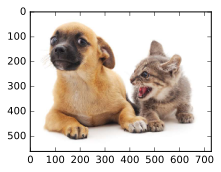

In [2]:
d2l.set_figsize()
img = Image.open('../Datasets/catdog.jpg')
d2l.plt.imshow(img)
d2l.plt.show()

### 边界框

用矩形框作为边界框，具体位置由矩形左上角坐标和右下角的坐标来确定。
图中的坐标原点在左上角，** 往右为x轴的正方向、往下为y轴的正方向。**

In [3]:
dog_bbox, cat_bbox = [60, 45, 378, 516], [400, 112, 655, 493]

# 将边界框(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib格式： ((左上x, 左上y), 宽, 高)
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2
    )

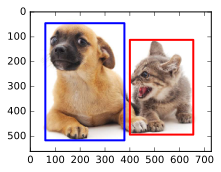

In [4]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))
d2l.plt.show()

### 小结

* 目标检测任务不仅需要找出图像里面所有感兴趣的目标，而且要知道它们的位置。位置一般由矩形边界框（左上右下的坐标值）来表示。